In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import csv
#import cPickle as pickle
import os.path
import scipy.ndimage as nd
import pandas as pd
import random
import scipy
import time
import pandas as pd
from sklearn import svm,cross_validation as cv
from sklearn.ensemble import RandomForestClassifier

IMAGE_WIDTH = 28
USE_PICKLE = False

def threshold(X):
    X[X < 0.15] = 0.0
    X[X >= 0.85] = 1.0
    return X

def rotate_dataset(X, Y):
    rot_X = np.zeros(X.shape)
    for index in range(X.shape[0]):
        sign = np.random.choice([-1, 1])
        angle = np.random.randint(8, 16)*sign
        rot_X[index, :] = threshold(nd.rotate(np.reshape(X[index, :],
            ((28, 28))), angle, reshape=False).ravel())
    XX = np.vstack((X,rot_X))
    YY = np.hstack((Y,Y))
    return XX, YY


def nudge_dataset(X, Y):
    nudge_size = 2
    direction_matricies = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    scaled_direction_matricies = [[[comp*nudge_size for comp in vect] for vect in matrix] for matrix in direction_matricies]
    shift = lambda x, w: convolve(x.reshape((IMAGE_WIDTH, IMAGE_WIDTH)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in scaled_direction_matricies])

    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

print("done1")

done1


In [3]:


given_dataset = pd.read_csv("../Desktop/dataset/digit/train.csv")
test = pd.read_csv("../Desktop/dataset/digit/test.csv")

#print(train.shape)
#print(test.shape)
#print(train.head())
#print(test.head())
#print(train.describe())
#print(test.describe())

train = given_dataset.iloc[:,1:].values
target = given_dataset.iloc[:,0].values
test = test.values

train, target = rotate_dataset(train,target)

print(train.shape)
print(target.shape)



(84000, 784)
(84000,)


In [4]:
print("dataset complete")

train = train/255.0
test = test/255.0

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train,target)
print("fitting complete")
pred = rf.predict(test)


np.savetxt('../Desktop/dataset/digit/submission_rand_forest_modification.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label',
           comments = '', fmt='%d')

print("done")
# accuracy --> .965

dataset complete
fitting complete
done


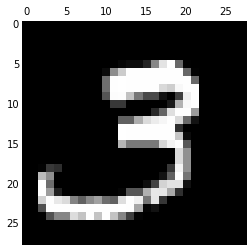

[3]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

img = test[4500]
pl.gray()
pl.matshow(np.reshape(img,(28,28)))
pl.show()

print(rf.predict(img))